# Prepare the Data

Brandwatch Queries used: `earnings OR earning`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsplt
plt.rcParams.update({'font.size': 8})

In [2]:
df = pd.read_csv('chart_data-volume-days-queries (1).csv')
df = df.T
df = df.iloc[1:].reset_index()
df.columns = ['date', 'volume']

In [3]:
df.date = df.date.apply(lambda x: x.split()[0])
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['quarter'] = df.date.dt.quarter

In [4]:
df = df[df.year != 2023]

In [5]:
df

,date,volume,year,month,day,quarter
0,2015-01-01,27,2015,1,1,1
1,2015-01-02,39,2015,1,2,1
2,2015-01-03,32,2015,1,3,1
3,2015-01-04,30,2015,1,4,1
4,2015-01-05,74,2015,1,5,1
...,...,...,...,...,...,...
2917,2022-12-27,27,2022,12,27,4
2918,2022-12-28,36,2022,12,28,4
2919,2022-12-29,35,2022,12,29,4
2920,2022-12-30,32,2022,12,30,4


# Plot

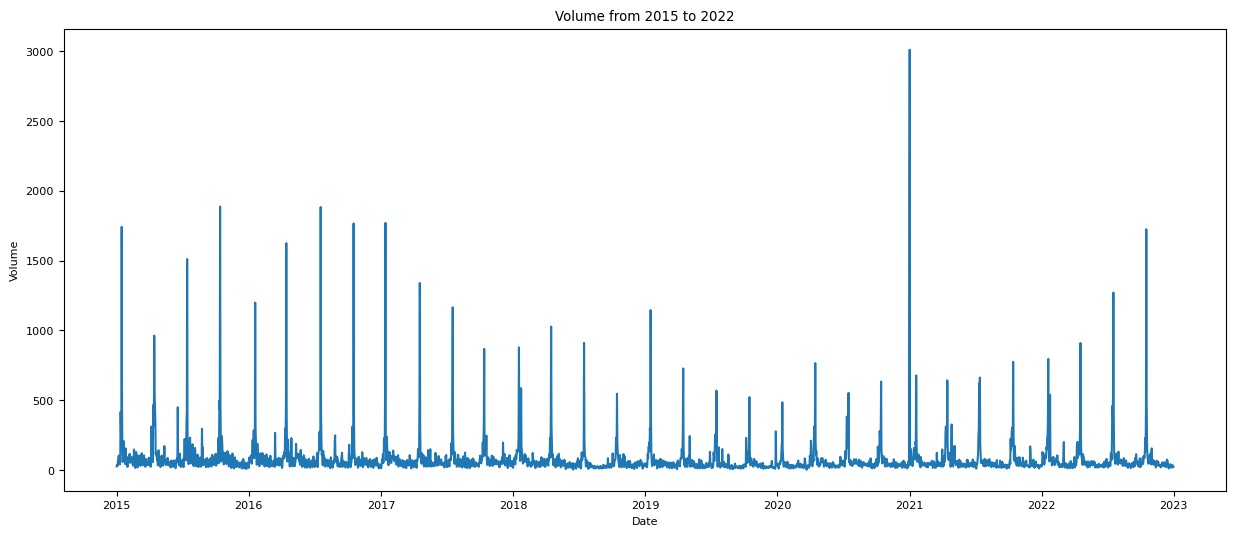

In [6]:
plt.figure(figsize=(15,6))
plt.plot(df.date, df.volume)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume from 2015 to 2022')
plt.show()

We observe a decrease in volume from 2015 to 2020 followed by a slow increase from 2020 until the present day. What is the cause of this trend?

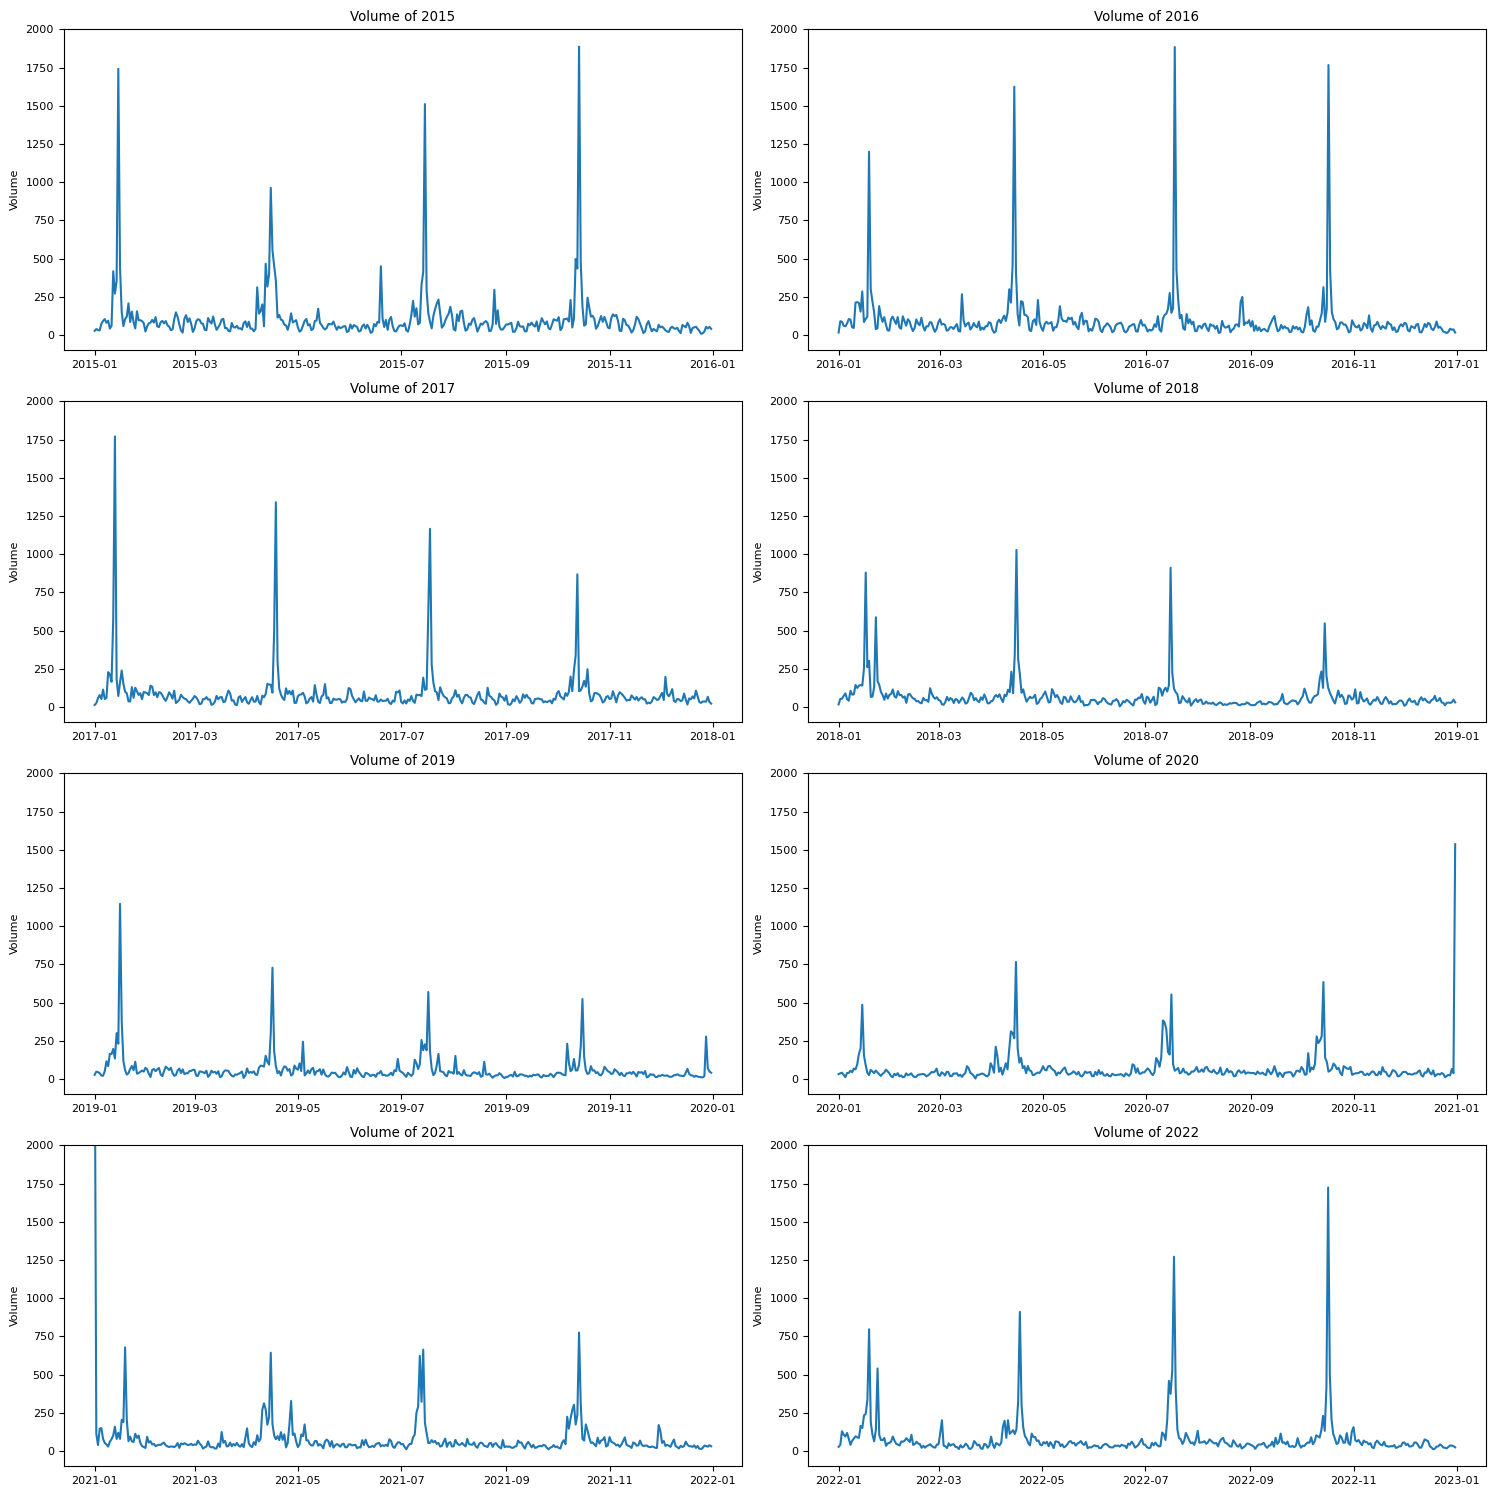

In [22]:
plt.figure(figsize=(15,15))
for i in range(0,8):
    plt.subplot(4,2,i+1)
    plt.ylim(-100, 2000)
    plt.plot(df[df.year==(i+2015)].date, df[df.year==(i+2015)].volume)
    plt.title(f'Volume of {i+2015}')
    plt.ylabel('Volume')
    plt.tight_layout()

We observe four yearly high points in volume, which coincide with the quarterly earnings events.

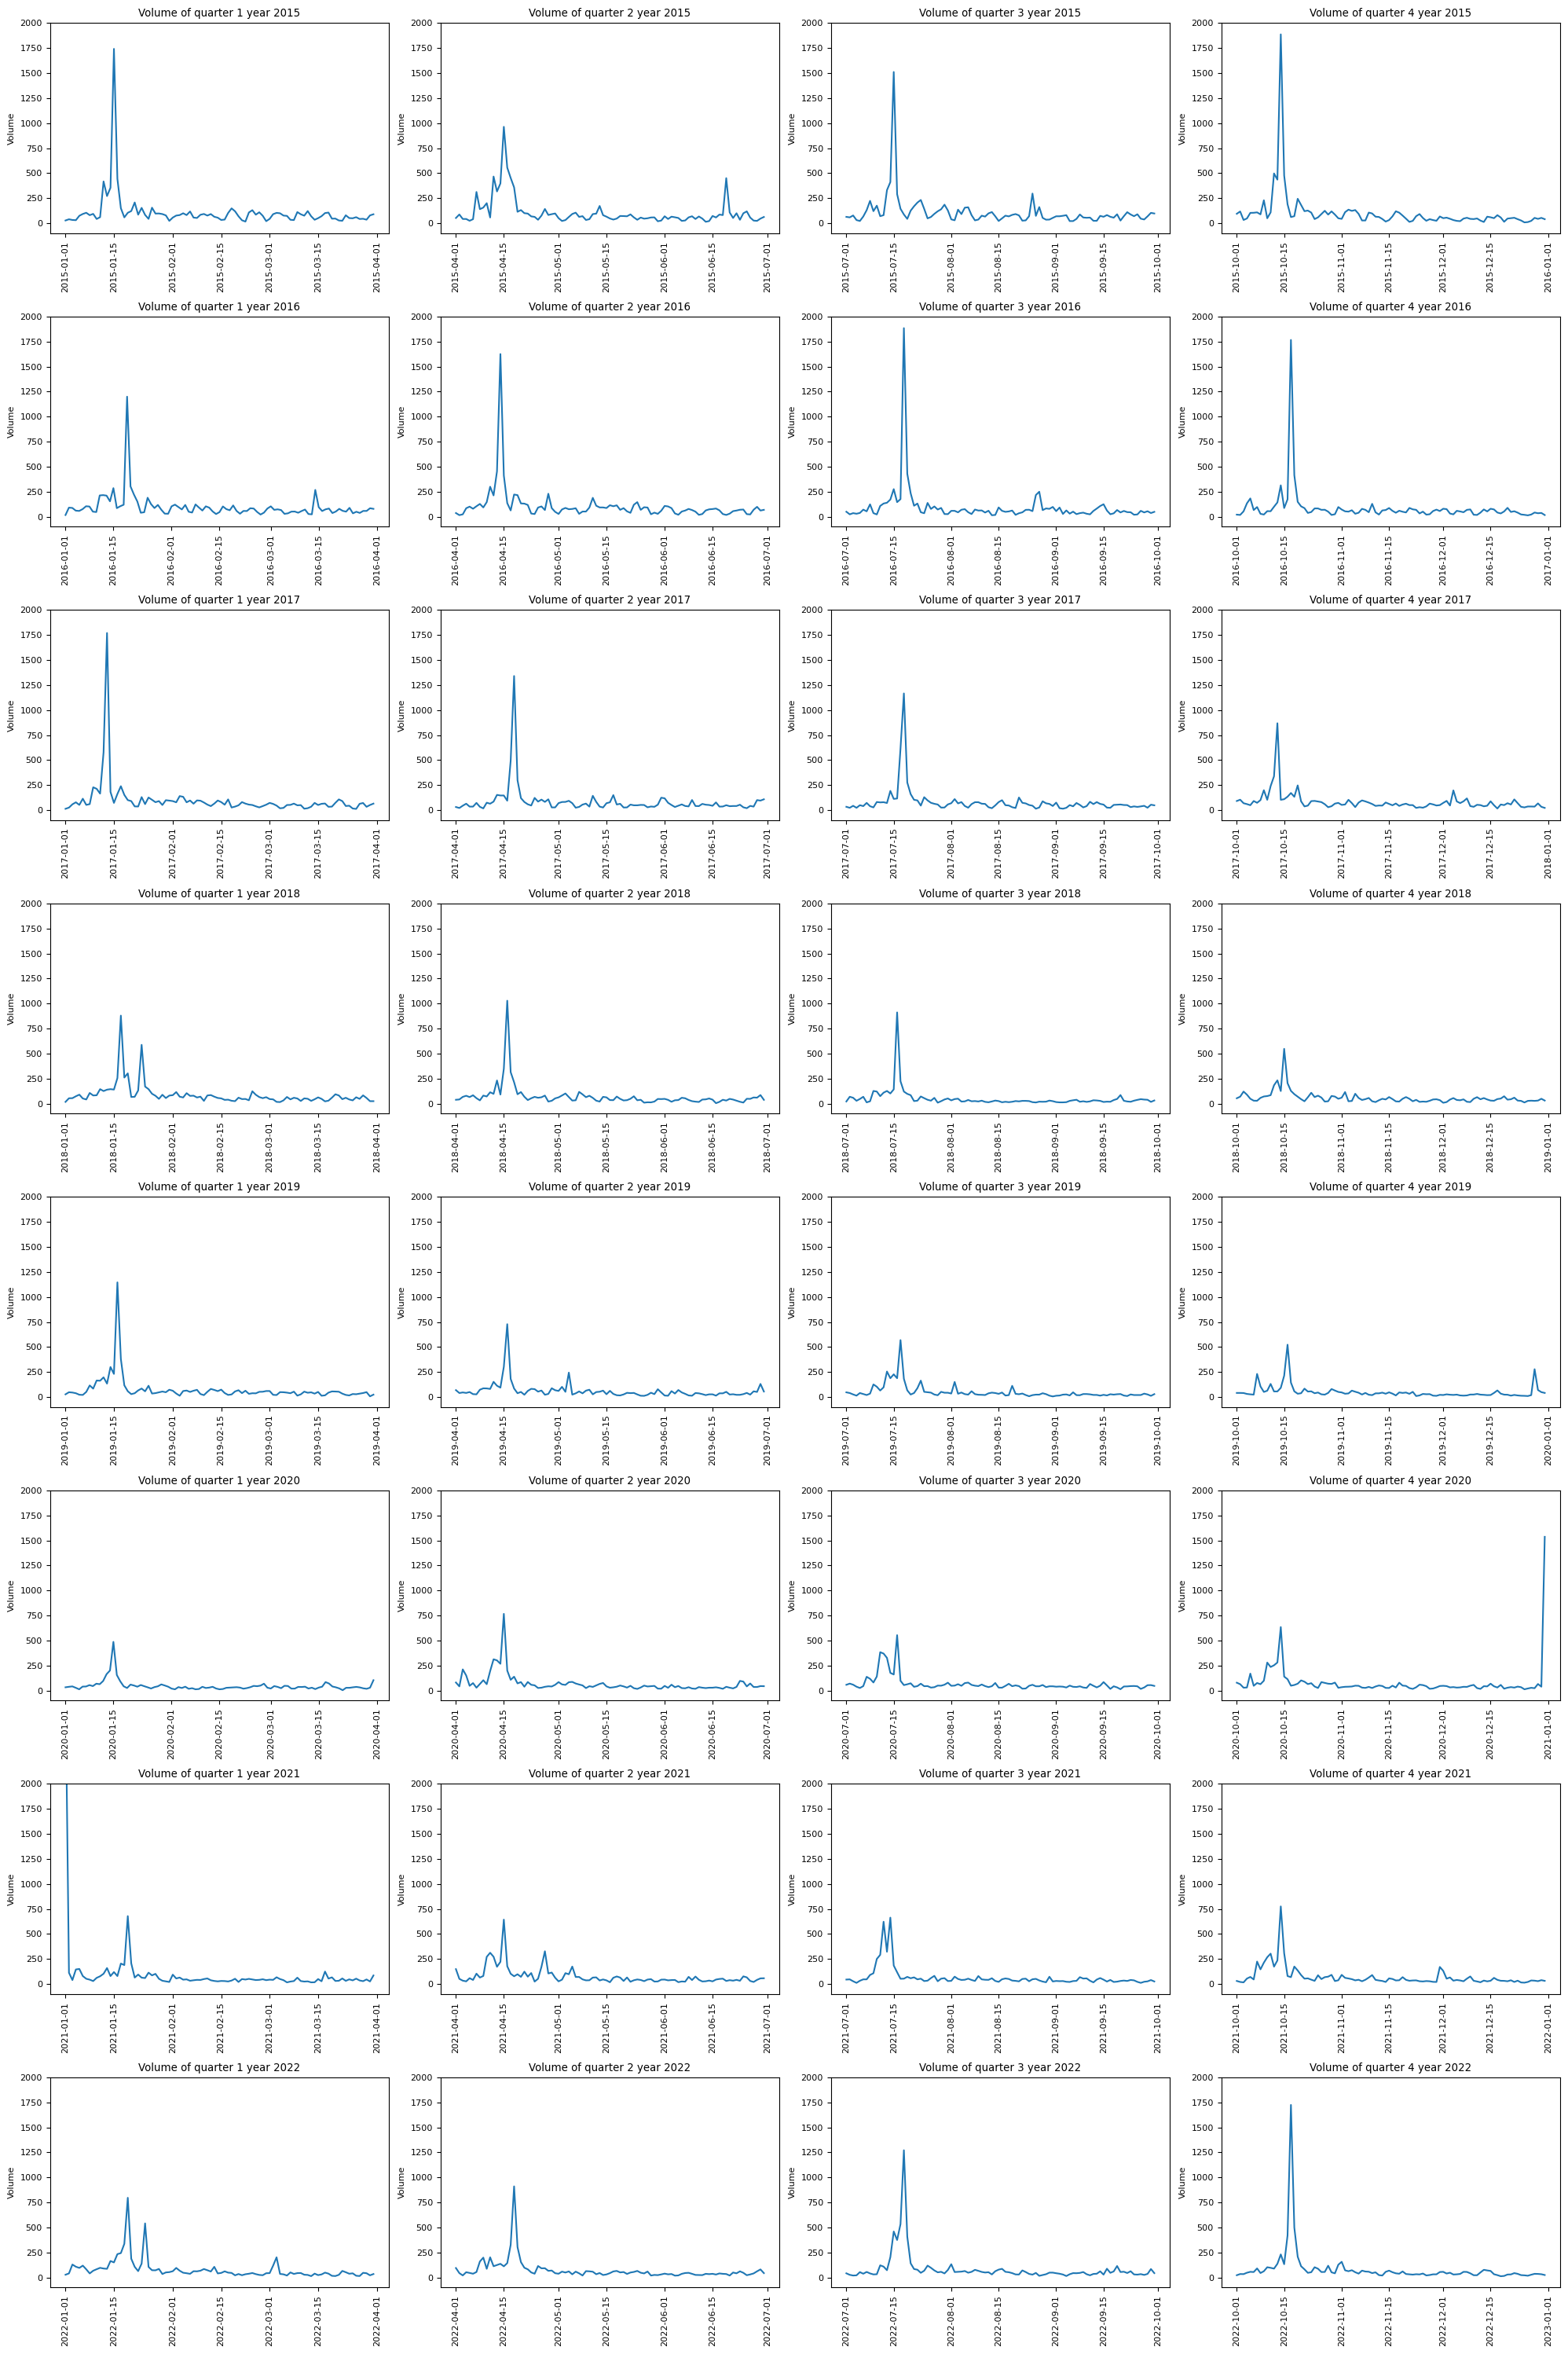

In [30]:
plt.figure(figsize=(20,30))
plot = 1
for year in range(0,8):
    for quarter in range(0,4):
        if plot > 32:
            break
        plt.subplot(8,4,plot)
        plt.ylim(-100, 2000)
        plot += 1
        temp_df = df[(df.year==(year+2015)) & (df.quarter==(quarter+1))]
        plt.plot(temp_df.date, temp_df.volume)
        plt.title(f'Volume of quarter {quarter+1} year {year+2015}')
        plt.ylabel('Volume')
        plt.xticks(rotation='vertical')
        plt.tight_layout()

What is the length of each event from beginning to end? When does the volume begin to rise prior to the quarterly earnings, and for how long does it remain elevated before returning to normal levels?

# What we would do this week?
1. Determine the length of an events from its start to its end
2. Determine the reason for the overal trend in volume from 2015 to 2023

# Note updated after the meeting
- Include Bank of America or BoA of BOA or BAC near earnings (within 10 words)
- Analyze the Payment Protection Plan (PPP)
- Evaluate news impact on trend from 2015-2023
- Study the 7-day period before & after events
- Investigate day of week and its impact on quarterly volume distribution
- Examine impact of World Economic Forum & seasons on earnings
- Normalize the data by setting a base noise level of 0
- Search for a trained model to explain May-June 2018 fluctuations